In [1]:
from pandas import *
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
df = read_csv(r"C:\Users\HP\Desktop\sales\netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df = df.dropna(how="all")

In [8]:
df.shape

(8807, 12)

# Which actor or actress appears most?

In [9]:
df.loc[1,"cast"]

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'

In [10]:
cast_counter = Counter()
for cast in df["cast"].dropna():
    cast_counter.update(cast.split(","))

top_15_results = cast_counter.most_common(15)

for cast,appears in top_15_results:
    print(f"{cast.strip()} : {appears}")

Anupam Kher : 39
Rupa Bhimani : 31
Takahiro Sakurai : 30
Julie Tejwani : 28
Om Puri : 27
Rajesh Kava : 26
Shah Rukh Khan : 26
Andrea Libman : 25
Yuki Kaji : 25
Boman Irani : 25
Paresh Rawal : 25
Vincent Tong : 24
Jigna Bhardwaj : 23
Akshay Kumar : 23
Fred Tatasciore : 21


# Perc of breakdown in tv show and movies

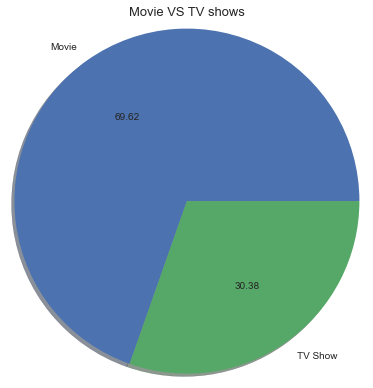

In [11]:
types_results = df.groupby("type")["title"].count()
types_results
plt.style.use("seaborn")
plt.title("Movie VS TV shows",size=13)
plt.pie(types_results,labels=types_results.index,normalize=True,radius=1.2,shadow=True,autopct="%.2f")
plt.tight_layout();

# Which country has more number of titles?

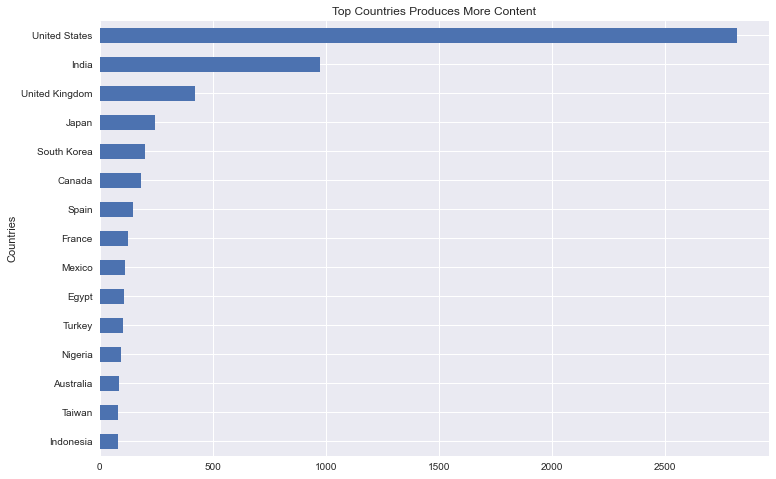

In [12]:
country_result = df.groupby("country")["title"].count().sort_values(ascending=False).head(15).sort_values()
country_result.plot(kind="barh",ylabel="No of Contents",xlabel="Countries",
                    title="Top Countries Produces More Content",figsize=(12,8));

#  What is the distribution of movie and TV show releases on Netflix over the years?

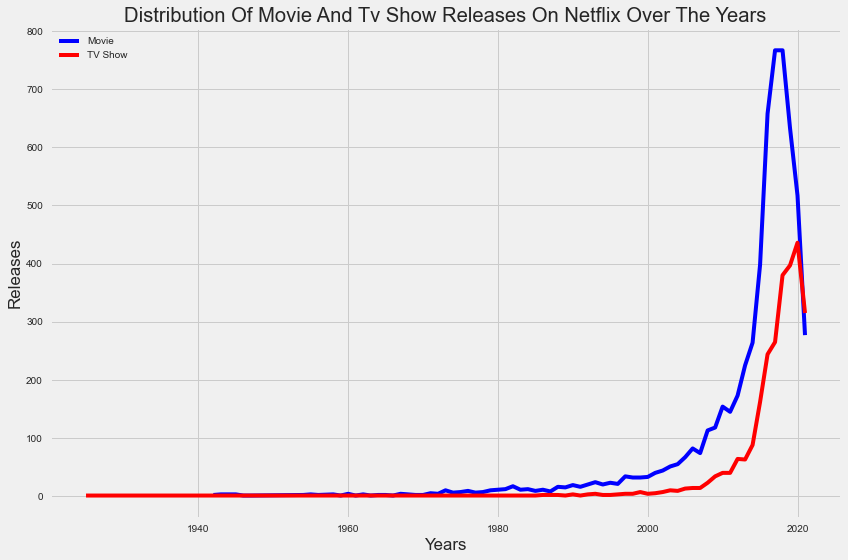

In [13]:
distribution_of_movie_and_tvshow = df.groupby(["type","release_year"]).size()
distribution_of_movie_and_tvshow

plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.plot(distribution_of_movie_and_tvshow.loc["Movie"].index,
         distribution_of_movie_and_tvshow.loc["Movie"].values,
         label="Movie",c="blue")
plt.plot(distribution_of_movie_and_tvshow.loc["TV Show"].index,
         distribution_of_movie_and_tvshow.loc["TV Show"].values,
         label="TV Show",c="red")
plt.xlabel("Years")
plt.ylabel("Releases")
plt.title(("Distribution of Movie and TV show releases on Netflix over the years").title())
plt.legend()
plt.tight_layout()
plt.show()


# What are the top 10 most common genres of movies and TV shows on Netflix, and what is their distribution?

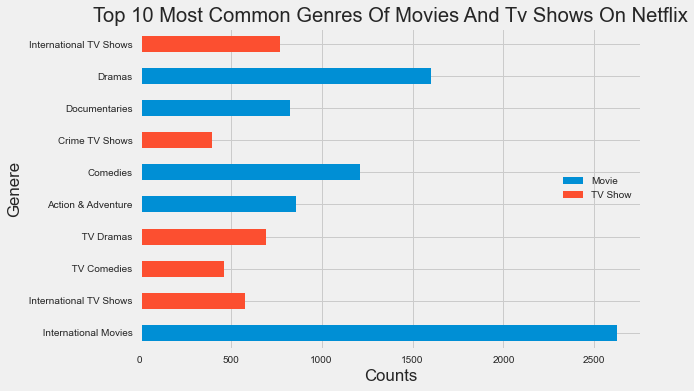

In [14]:
df = read_csv(r"C:\Users\HP\Desktop\sales\netflix_titles.csv")
genere_df = df
genere_df["listed_in"] = genere_df["listed_in"].str.split(",")
genere_df = df.explode("listed_in")
count_df = genere_df.groupby(["type","listed_in"]).size().reset_index(name="counts")#series -> dataframe
top_10 = count_df.groupby("type").apply(lambda x:x.nlargest(5,"counts")).reset_index(drop=True)#droping unnecssary indices
top_10.pivot(index="listed_in",columns="type",values="counts").plot(kind="barh",stacked=True)
plt.style.use("tableau-colorblind10")
plt.xlabel("Counts")
plt.ylabel("Genere")
plt.legend(loc="center right")
plt.title(("top 10 most common genres of movies and TV shows on Netflix").title());

# What are the top 10 Countries with the most number of movies and TV shows  available on netflix?

In [15]:
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

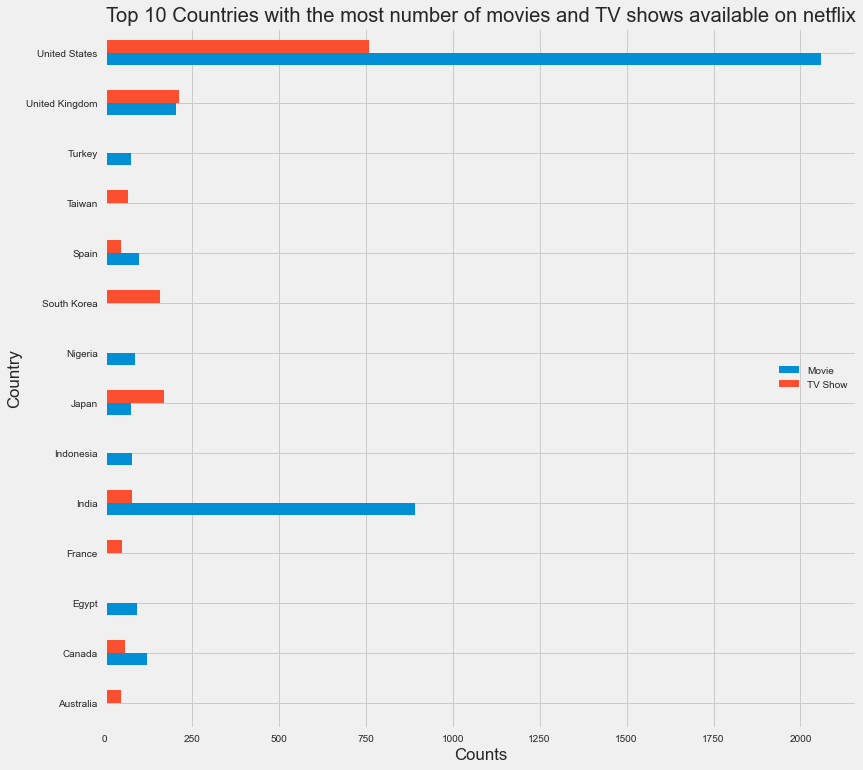

In [16]:
country_df = df.groupby(["type","country"]).size().reset_index(name="values")
count_df = country_df.groupby("type").apply(lambda x:x.nlargest(10,"values")).reset_index(drop=True)
plt.style.use("fivethirtyeight")
count_df.pivot(index="country",columns="type",values="values").plot(kind="barh",figsize=(12,12))
plt.title("Top 10 Countries with the most number of movies and TV shows available on netflix")                                                              
plt.xlabel("Counts")
plt.ylabel("Country")
plt.legend(loc="center right")
plt.show()

# What is the distribution of movie duration on netflix?

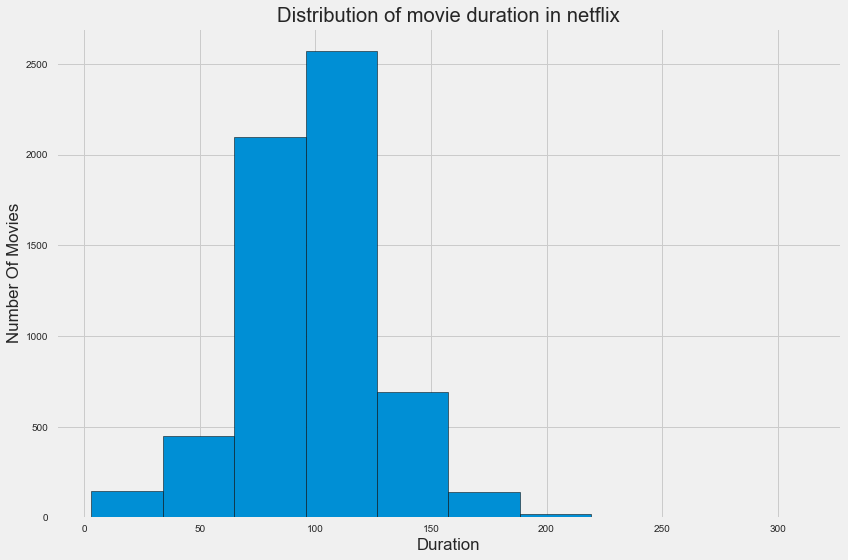

In [17]:
filt = df["type"] == "Movie"
duration = df.loc[filt,"duration"].reset_index(drop=True)
duration = to_numeric(duration.str.replace("min",""))
duration.plot(kind="hist",bins=10,title="Distribution of movie duration in netflix"
             ,figsize=(12,8),edgecolor="black")
plt.ylabel("Number Of Movies")
plt.xlabel("Duration")
plt.tight_layout();

# What is ditribution of contents added in the netflix over the year?

In [18]:
df["date_added"] = to_datetime(df["date_added"])

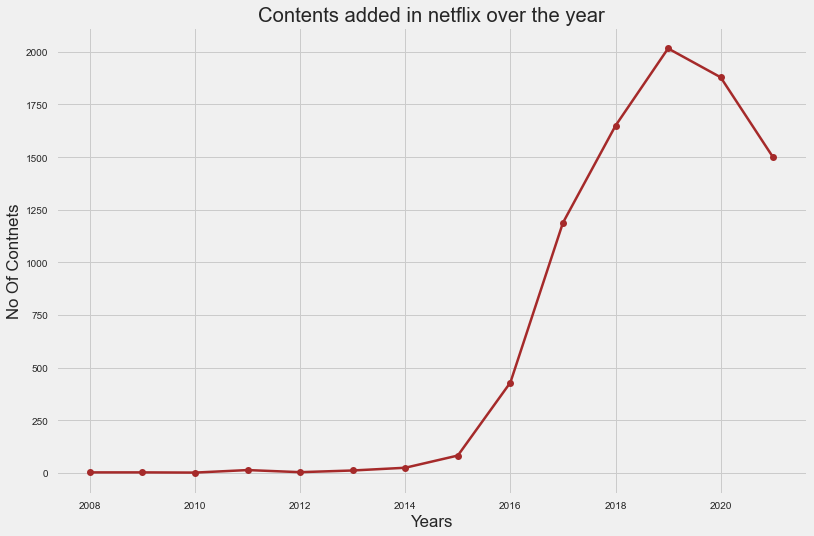

In [19]:
(df.groupby(df["date_added"].dt.year)["title"].count()).plot(ls="-",lw=2.5,c="Brown",figsize=(12,8),marker="o")
plt.xlabel("Years")
plt.ylabel("No Of Contnets")
plt.title("Contents added in netflix over the year");

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Most Common Ratings Of Movie and TV Shows?

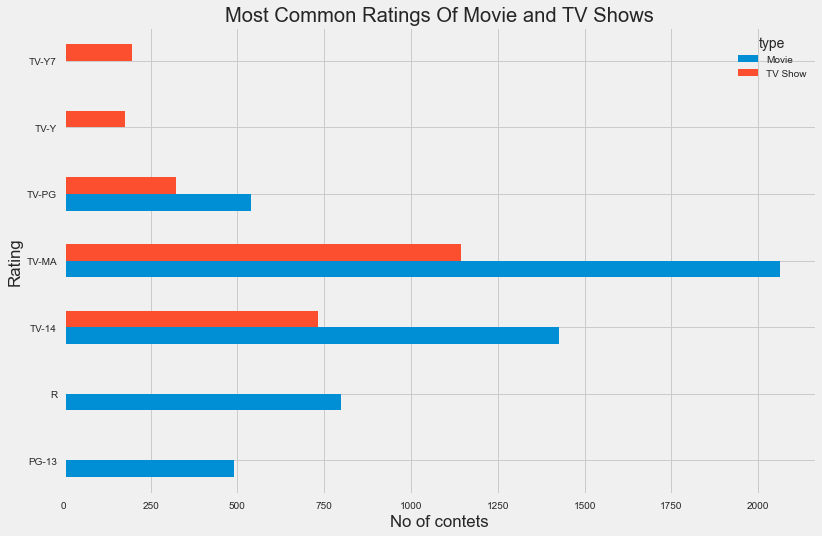

In [21]:
count_df = df.groupby(["type","rating"]).size().reset_index(name="counts")
top_5 = count_df.groupby("type").apply(lambda x:x.nlargest(5,"counts")).reset_index(drop=True)
top_5.pivot(index="rating",columns="type",values="counts").plot(kind="barh",
                                                               title="Most Common Ratings Of Movie and TV Shows"
                                                               ,figsize=(12,8))
plt.xlabel("No of contets")
plt.ylabel("Rating");

# How many movies and TV shows on netflix were released in the last decade(2010-2019)?

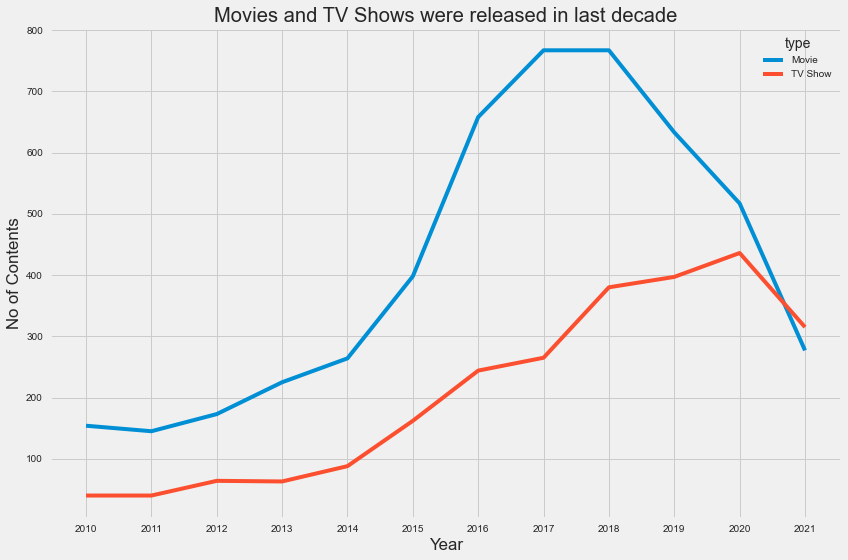

In [22]:
yearly_grp = df.groupby(["type","release_year"]).size().reset_index(name="count")
yearly_grp.pivot(index="release_year",columns="type",values="count").loc[2010:].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("No of Contents")
plt.title("Movies and TV Shows were released in last decade")
plt.xticks(ticks=list(range(2010,2022)))
plt.tight_layout();


# Top  Directors make more content in netflix ?

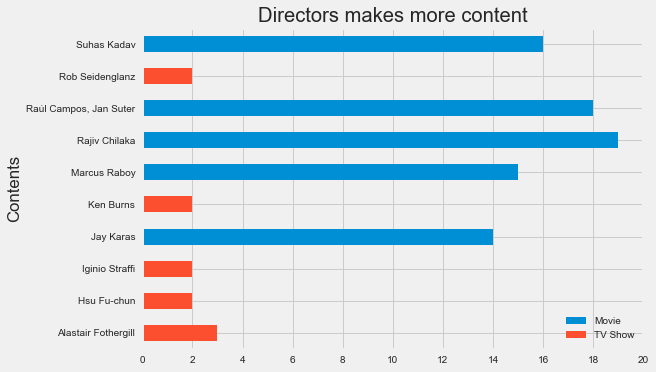

In [23]:
count_df = df.groupby(["type","director"]).size().reset_index(name="count")
result_df = count_df.groupby("type").apply(lambda x:x.nlargest(5,"count")).reset_index(drop=True)
result = result_df.pivot(index="director",columns="type",values="count")
result.plot(kind="barh",stacked=True,xlabel="Contents",ylabel="Directors",xticks=list(range(0,22,2))
           ,title="Directors makes more content")
plt.legend(loc="lower right");

In [24]:
from itertools import combinations,permutations

# What is the most popular combinations of generes?

In [27]:
df = read_csv(r"C:\Users\HP\Desktop\sales\netflix_titles.csv")
combination_counter = Counter()
for genere in df["listed_in"]:
    combination_counter.update(list(combinations(genere.split(","),2)))
print("Combination of actor and actress")
combination_counter.most_common(5)

Combination of actor and actress


[(('Dramas', ' International Movies'), 1047),
 (('Comedies', ' International Movies'), 726),
 (('Comedies', ' Dramas'), 455),
 (('Dramas', ' Independent Movies'), 448),
 ((' Dramas', ' International Movies'), 436)]

# What is the combinations of actor/actres?

In [28]:
combination_counter = Counter()
for cast in df["cast"].dropna():
    combination_counter.update(list(combinations(cast.split(","),3)))
print(("Most 3 combinations of casting in netflix content!").title())
for casts,value in combination_counter.most_common(5):
    print(f"{[cast.strip() for cast in casts]} : {value}")


Most 3 Combinations Of Casting In Netflix Content!
['Julie Tejwani', 'Rupa Bhimani', 'Jigna Bhardwaj'] : 19
['Vatsal Dubey', 'Julie Tejwani', 'Rupa Bhimani'] : 18
['Vatsal Dubey', 'Julie Tejwani', 'Jigna Bhardwaj'] : 18
['Vatsal Dubey', 'Rupa Bhimani', 'Jigna Bhardwaj'] : 18
['Julie Tejwani', 'Rupa Bhimani', 'Rajesh Kava'] : 18
